In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import datasets

import tensorflow as tf
from tensorflow.keras import Input, Model, layers, losses, optimizers

from matplotlib import pyplot as plt

**Differential Privacy**

The goal of differential privacy is to minimize the effect, a single training sample can have of the output of a (randomized) algorithm. Therefore, perform the following tasks:
1) Load the boston housing dataset, one-hot encode the categorical features and normalize (use StandardScaler) the continuous features.

2) Split the data into train/test (80% / 20%) sets (give a seed for reproducibility, i.e. random_state=42).

3) Train a LinearRegression model (set fit_intercept=False) on the training set and compute r2_score and mean_squared_error on the test set.

4) Find the training sample with the largest prediction error. Create a mask to exclude that **sample** from the training set.

5) Fit the same LinearRegression model to the training set excluding the found **sample**. Measure the deviation of the two regression models (e.g. np.linalg.norm(w-w'), the weights w can be found in LinearRegression.coef_)

6) Add noise of varying scales to the training set, create a second training set by excluding the **sample** and train linear regression models on each. How does the utility (r2_score, mse) behave with increasing noise level? What happens to the difference between the fitted models' weights? What about the prediction error on the **sample**? Plot the r2_score, mse, prediction error on **sample** and weight difference over the noise scale.




In [2]:
# load dataset
boston_dataset = datasets.load_boston()
X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
Y = pd.DataFrame(boston_dataset.target, columns=['price'])

# normalize continuous features
cont_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_scaler = StandardScaler()
X_pp = X.copy()
X_pp[cont_features] = feature_scaler.fit_transform(X[cont_features])
X_pp.head()

# normalize targets
Y_pp = Y.copy()
target_scaler = StandardScaler()
Y_pp[['price']] = target_scaler.fit_transform(Y[['price']])

# one-hot-encode the 'RAD' feature
X_pp[['CHAS', 'RAD']] = X_pp[['CHAS', 'RAD']].astype('int32')
X_pp = pd.get_dummies(X_pp, columns=['RAD'])
X_pp.head()

# split data and target DataFrames into data train, data test, target train and target test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_pp.to_numpy(), Y_pp.to_numpy(), test_size=0.20, random_state=42)

/Users/vishy/miniforge3/envs/cai/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [3]:
# train regression model and find sample with largest prediction error
LR = LinearRegression(fit_intercept=False)

# create neighboring dataset, i.e. training set without the sample with largest prediction error

# train on that dataset the same model, measure the difference between both models' coefficients

In [4]:
# train on varying noise scales, you should repeat the computation for each sigma several times and average
sigmas = np.logspace(-3,2, 24) # noise scales




In [5]:
# plot results


**Autoencoder**

An autoencoder is a model that maps samples into a so-called latent space and then back to the original space. It consists of an encoder model X->Z and a decoder model Z->X. 
It is used for dimensionality reduction, representation learning and as generative model. The training objective of an autoencoder is usually a combination of reconstruction error and some regularization (on its weights and/or the latent representation).

1) Load the mnist dataset, split into 10k training samples and 1000 test samples. Take 1000 training samples for evaluation.

2) Build a linear autoencoder (encoder/decoder are linear models each). Train your autoencoder with 2D latent space Z. 

3) Visualize the results as follows: For 1000 training and 1000 test samples

    a) Create a scatterplot of the latent embeddings
    
    b) Plot the reconstructions of 100 samples in a 10x10 grid
    
    c) Plot the corresponding original samples below
    
3) Build a non-linear autoencoder. The encoder has 2 conv layers (32/64 filters of size (3,3), strides 2), followed by a dense layer that maps to 2-dimensional latent variables. The decoder consists of a dense layer, followed by 2 conv-transpose layers (64/32, ... matching the encoder). Train the non-linear autoencoder and visualize the results as above.

4) Create synthetic samples by randomly sampling 100 points in latent space and decoding them using the linear and non-linear decoders.


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = x_train.astype("float32").reshape((-1, 28, 28, 1)) / 255
Xtrain, Xtest_, Ytrain, Ytest_ = train_test_split(X, y_train, train_size=10000)
Xtest, Xtest_, Ytest, Ytest_ = train_test_split(Xtest_, Ytest_, train_size=1000)

Xtrain_, _, Ytrain_, _ = train_test_split(Xtrain, Ytrain, train_size=1000)

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = x_train.astype('float32').reshape((-1, 28,28,1))/255.
Xtrain, Xtest_, Ytrain, Ytest_ = train_test_split(X, y_train, train_size=10000)
Xtest, Xtest_, Ytest, Ytest_ = train_test_split(Xtest_, Ytest_, train_size=1000)

Xtrain_, _, Ytrain_, _ = train_test_split(Xtrain, Ytrain, train_size=1000)

In [6]:
# helper function to plot several samples in one image
def make_grid(X, grid_size=[10,10]):
    sh = [X.shape[1], X.shape[2]]
    G = np.zeros((sh[0]*grid_size[0], sh[1]*grid_size[1]))
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            G[i*sh[0]:(i+1)*sh[0], j*sh[1]:(j+1)*sh[1]] = X[i*grid_size[1]+j].reshape(sh)
    return G

In [8]:
# define autoencoder model
class AutoEncoder(Model):
    
    def __init__(self, encoder, decoder, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self, X, training=None):
        z = self.encoder(X)
        x = self.decoder(z)
        return x    

In [18]:
class AutoEncoder(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        
    def call(self, X, training=None):
        z = self.encoder(X)
        x = self.decoder(z)
        return x

In [19]:
# linear models    
l = Xtrain.shape[1]
h = Xtrain.shape[2]
latent_dim = 2

encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(latent_dim, input_shape=[l*h], activation="relu"),
    ])

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(l*h, input_shape=[latent_dim], activation="sigmoid"),
    tf.keras.layers.Reshape((l, h)),
])

linear_autoencoder = AutoEncoder(encoder, decoder)
linear_autoencoder.compile(optimizer="adam", loss=losses.MeanSquaredError())

In [20]:
# train linear autoencoder
history = linear_autoencoder.fit(Xtrain, Xtrain,
                                 epochs=50,
                                 shuffle=True,
                                 validation_data=(Xtest, Xtest))

Epoch 1/50
  9/313 [..............................] - ETA: 1s - loss: 0.2302  

2022-12-02 12:46:14.630169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0997 - val_loss: 0.0711
Epoch 2/50
  1/313 [..............................] - ETA: 1s - loss: 0.0658

2022-12-02 12:46:16.527301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0694 - val_loss: 0.0671
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0645 - val_loss: 0.0624
Epoch 4/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0623 - val_loss: 0.0612
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0614 - val_loss: 0.0605
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0607 - val_loss: 0.0598
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0602 - val_loss: 0.0593
Epoch 8/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0597 - val_loss: 0.0589
Epoch 9/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0593 - val_loss: 0.0585
Epoch 10/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0589 - val_loss: 0.0582
Epoch 11/50
313/313 [==============================] - 2s 6ms/step - loss: 0.0587 - val_loss: 0.0579
Epoch 12/

32/32 [==============================] - 0s 1ms/step


2022-12-02 12:49:55.568404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


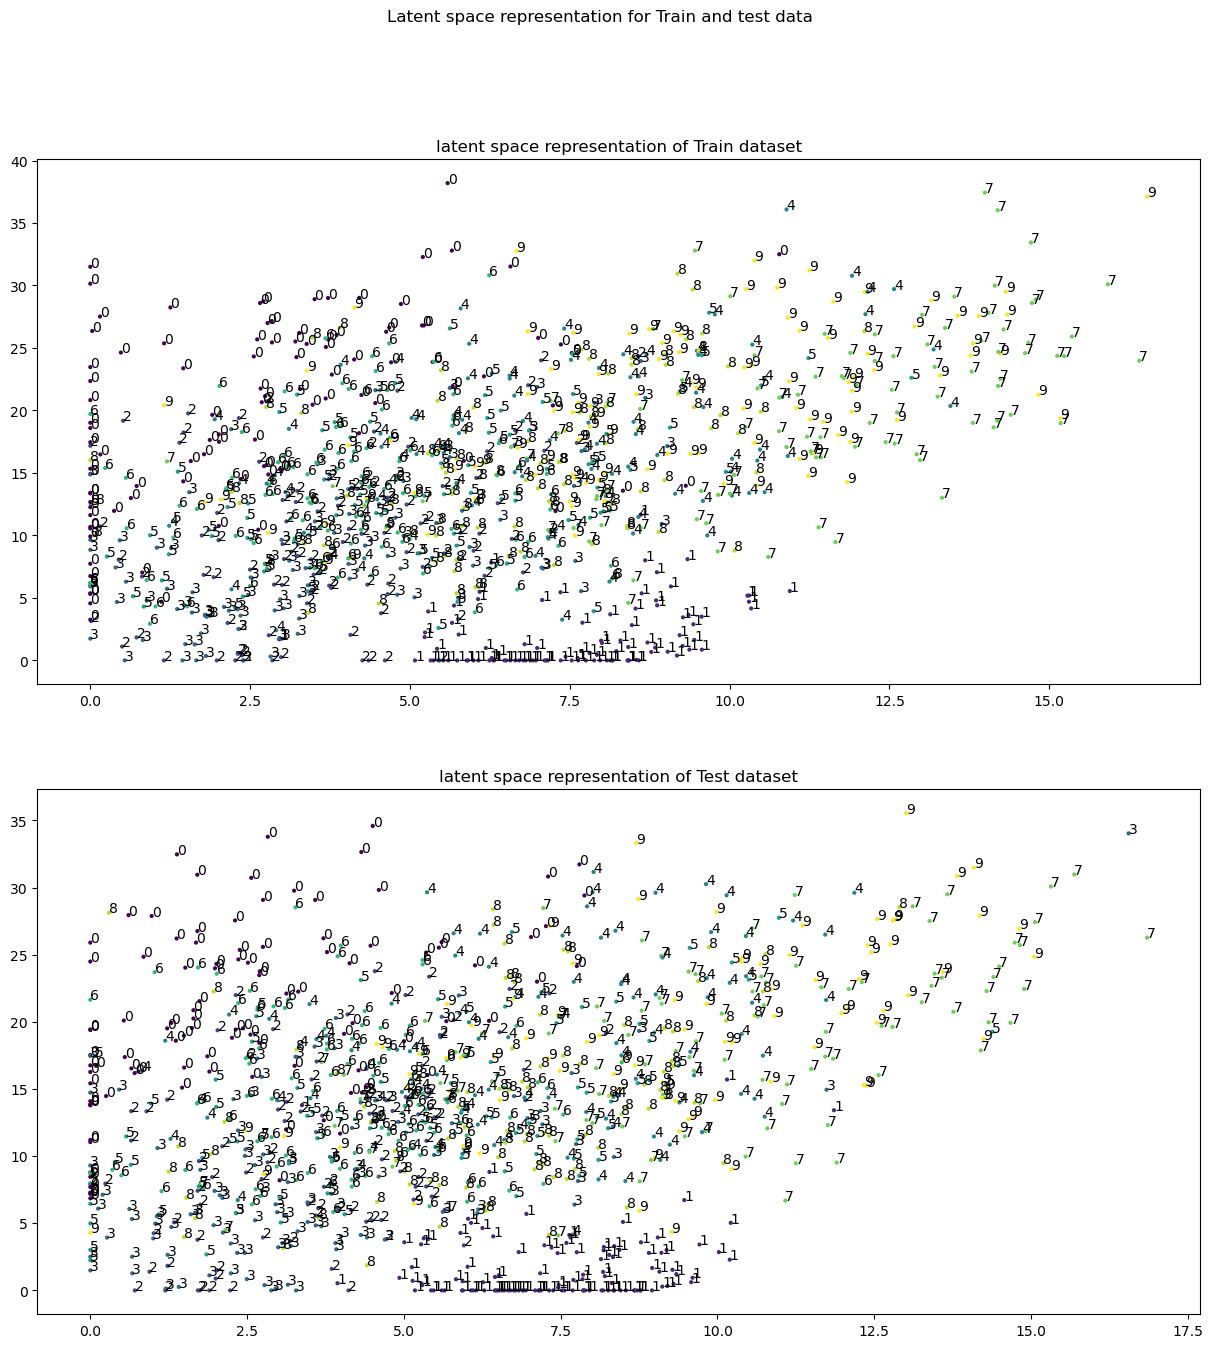

In [21]:
# visualize latent space, reconstructions and original samples for train and test data
fig, axs = plt.subplots(2, figsize=(15,15))
fig.suptitle('Latent space representation for Train and test data')

train_latent_space = linear_autoencoder.encoder.predict(Xtrain[:1000])
axs[0].scatter(train_latent_space[:,0], train_latent_space[:,1], marker='o', s=4, c=Ytrain[0:1000])
axs[0].set_title("latent space representation of Train dataset")
for i, txt in enumerate(Ytrain[:1000]):
    axs[0].annotate(txt, (train_latent_space[i,0], train_latent_space[i,1]))
    
test_latent_space = linear_autoencoder.encoder.predict(Xtest)
axs[1].scatter(test_latent_space[:,0], test_latent_space[:,1], marker='o', s=4, c=Ytest)
for i, txt in enumerate(Ytest):
    axs[1].annotate(txt, (test_latent_space[i,0], test_latent_space[i,1]))
axs[1].set_title("latent space representation of Test dataset")
plt.show()

Text(0.5, 1.0, 'Reconstructed test images')

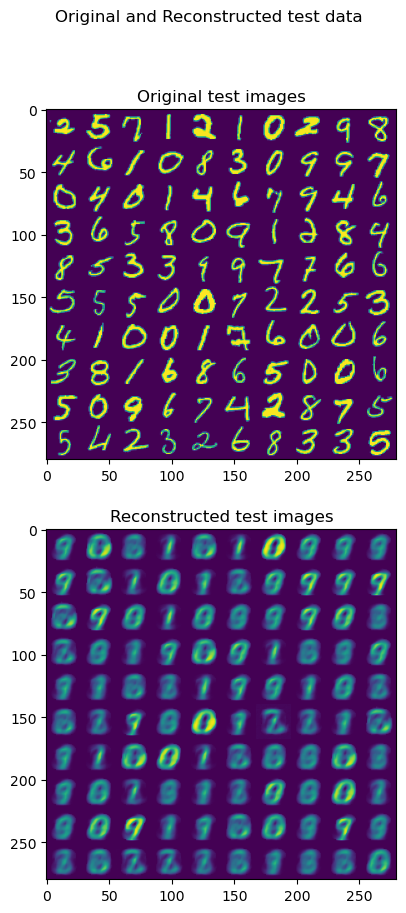

In [22]:
# visualize reconstructions and original samples for test data

original = make_grid(Xtest[:100])

decoded_imgs = linear_autoencoder.call(Xtest).numpy()
reconstructed = make_grid(decoded_imgs[:100])

fig, axs = plt.subplots(2, figsize=(10,10))
fig.suptitle('Original and Reconstructed test data')
axs[0].imshow(original)
axs[0].set_title('Original test images')
axs[1].imshow(reconstructed)
axs[1].set_title('Reconstructed test images')

Text(0.5, 1.0, 'Reconstructed train images')

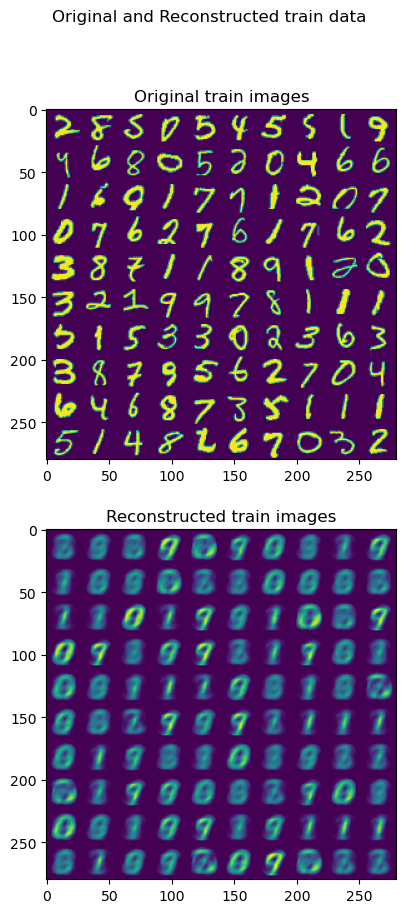

In [23]:
# visualize reconstructions and original samples for train data
original = make_grid(Xtrain[:100])

decoded_imgs = linear_autoencoder.call(Xtrain).numpy()
reconstructed = make_grid(decoded_imgs[:100])

fig, axs = plt.subplots(2, figsize=(10,10))
fig.suptitle('Original and Reconstructed train data')
axs[0].imshow(original)
axs[0].set_title('Original train images')
axs[1].imshow(reconstructed)
axs[1].set_title('Reconstructed train images')

In [27]:
# nonlinear models
l = Xtrain.shape[1]
h = Xtrain.shape[2]
latent_dim = 2

encoder = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(latent_dim, activation="relu"),
])

decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7*7*64, activation="relu"),
    tf.keras.layers.Reshape((7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), activation="relu", padding="same", strides=2),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same", strides=2),
    tf.keras.layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same"),
])

non_linear_autoencoder = AutoEncoder(encoder, decoder)
non_linear_autoencoder.compile(optimizer="adam", loss=losses.MeanSquaredError())
non_linear_autoencoder.build((None, 28, 28, 1))
non_linear_autoencoder.summary()


Model: "auto_encoder_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 2)                 25090     
                                                                 
 sequential_12 (Sequential)  (None, 28, 28, 1)         65089     
                                                                 
Total params: 90,179
Trainable params: 90,179
Non-trainable params: 0
_________________________________________________________________


In [28]:
# train non-linear autoencoder
history = non_linear_autoencoder.fit(Xtrain, Xtrain,
                                     epochs=50,
                                     shuffle=True,
                                     validation_data=(Xtest, Xtest))

Epoch 1/50


2022-12-02 13:04:47.424970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.0739

2022-12-02 13:04:52.897518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 14ms/step - loss: 0.0739 - val_loss: 0.0564
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0545 - val_loss: 0.0526
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0524 - val_loss: 0.0511
Epoch 4/50
313/313 [==============================] - 4s 14ms/step - loss: 0.0511 - val_loss: 0.0500
Epoch 5/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0502 - val_loss: 0.0491
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0494 - val_loss: 0.0484
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0487 - val_loss: 0.0478
Epoch 8/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0481 - val_loss: 0.0478
Epoch 9/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0475 - val_loss: 0.0472
Epoch 10/50
313/313 [==============================] - 4s 13ms/step - loss: 0.0470 - val_loss: 0.0470


 1/32 [..............................] - ETA: 0s

2022-12-02 13:08:13.047373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 2ms/step


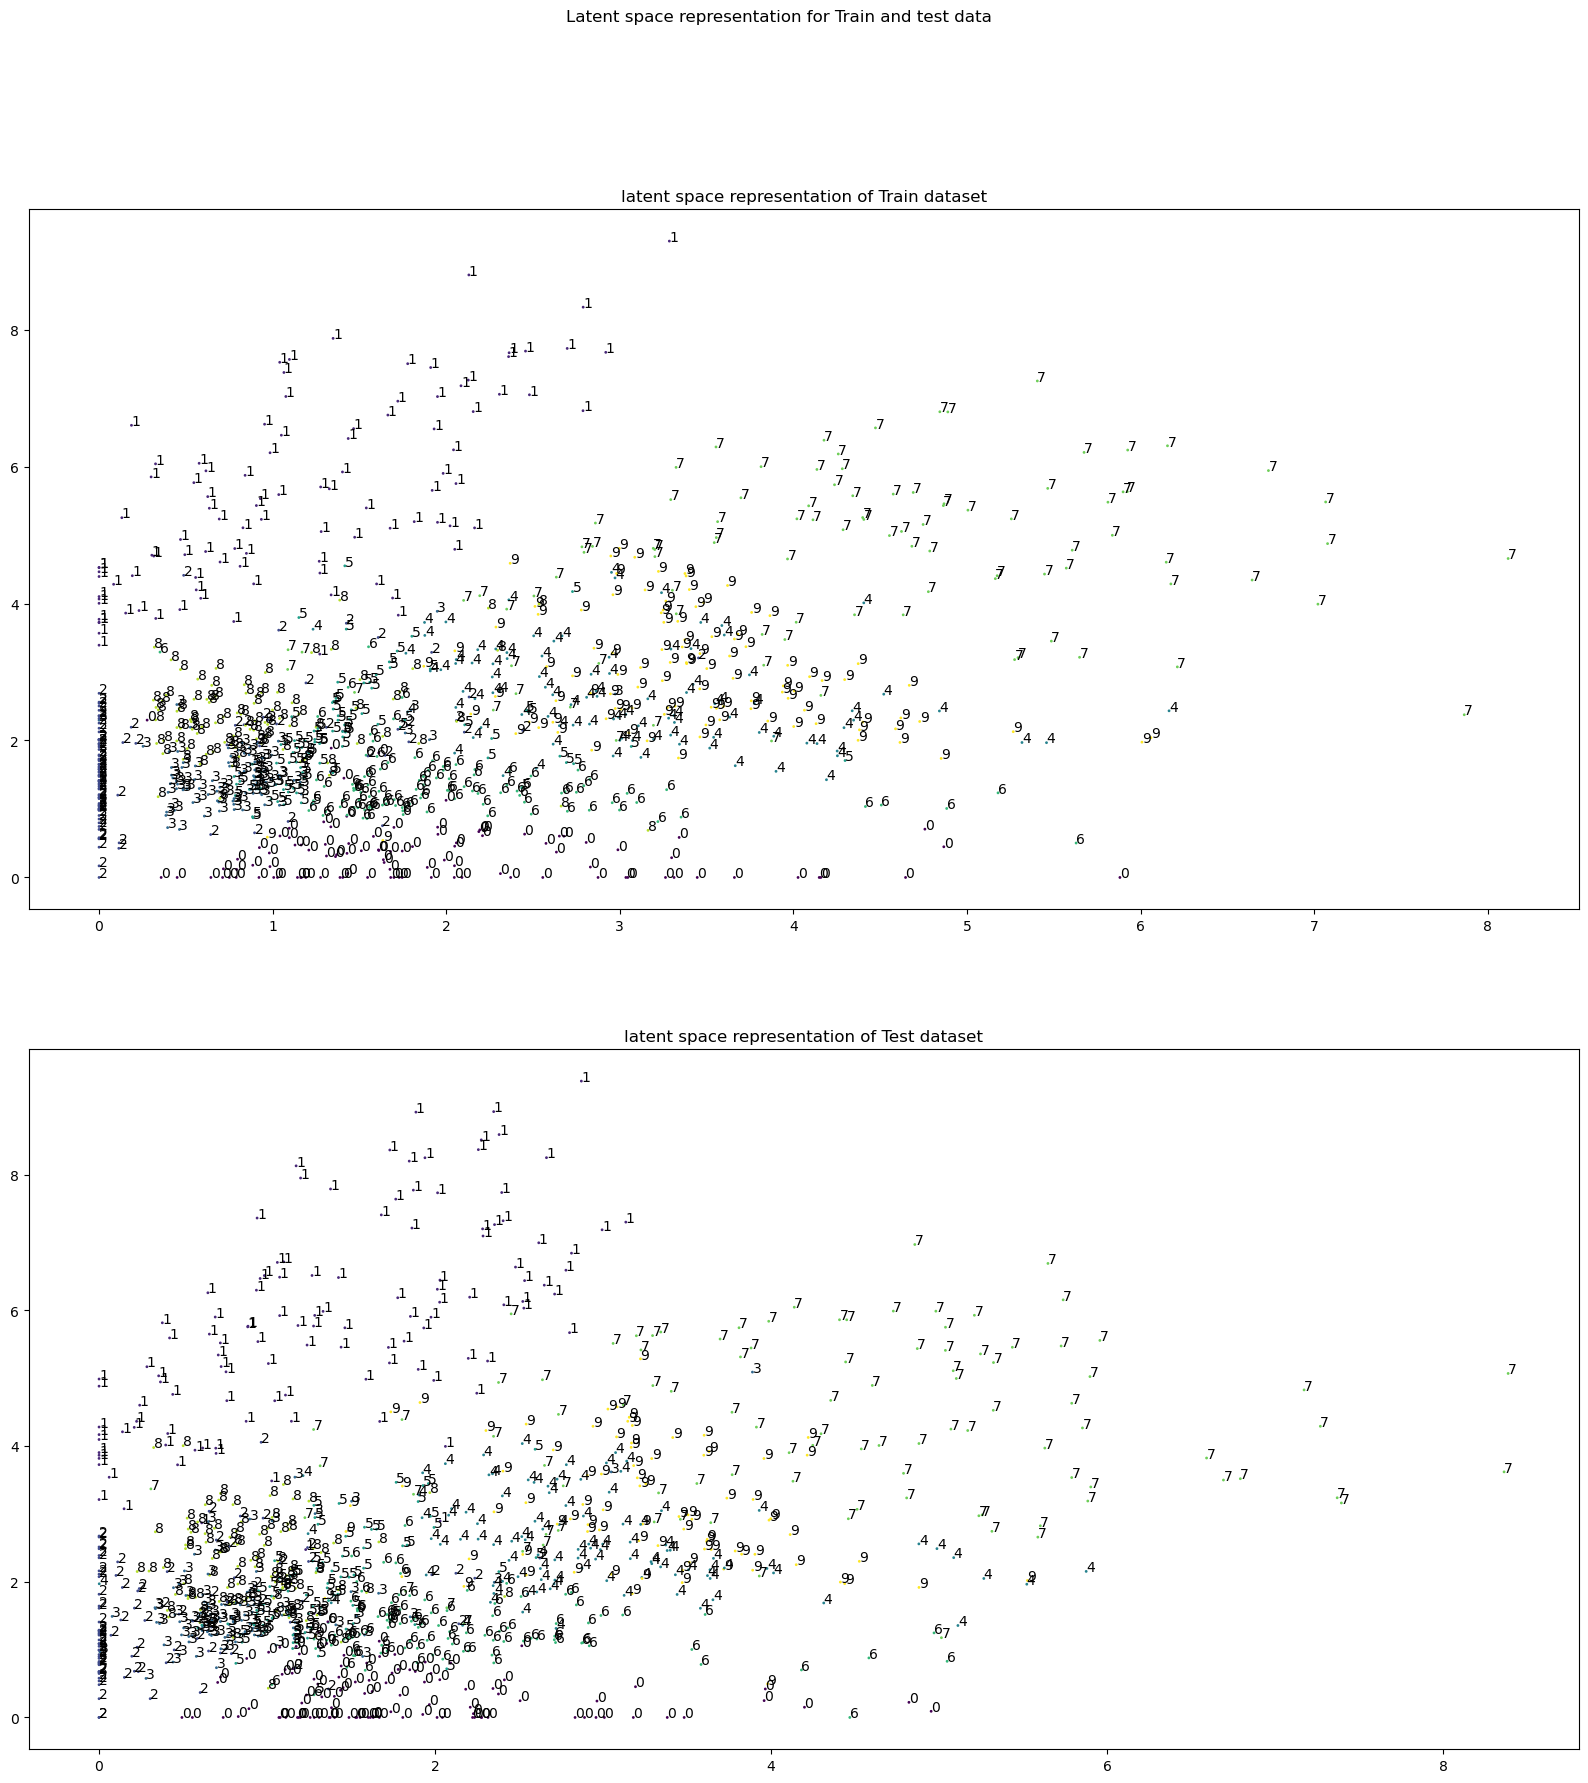

In [29]:
# Visualization as before for non-linear model
# visualize latent space
fig, axs = plt.subplots(2, figsize=(20,20))
fig.suptitle('Latent space representation for Train and test data')

train_latent_space = non_linear_autoencoder.encoder.predict(Xtrain[:1000])
axs[0].scatter(train_latent_space[:,0], train_latent_space[:,1], marker='o', s=1, c=Ytrain[:1000])
axs[0].set_title("latent space representation of Train dataset")
for i, txt in enumerate(Ytrain[:1000]):
    axs[0].annotate(txt, (train_latent_space[i,0], train_latent_space[i,1]))

test_latent_space = non_linear_autoencoder.encoder.predict(Xtest)
axs[1].scatter(test_latent_space[:,0], test_latent_space[:,1], marker='o', s=1, c=Ytest[:1000])
for i, txt in enumerate(Ytest):
    axs[1].annotate(txt, (test_latent_space[i,0], test_latent_space[i,1]))
axs[1].set_title("latent space representation of Test dataset")
plt.show()

In [15]:
# Try out linear decoder as generative model


In [16]:
# Non-linear decoder as generative model


In [31]:
import keras

In [32]:
input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)

#need to know the shape of the network here for the decoder

shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)

NameError: name 'img_shape' is not defined

In [ ]:
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling)([z_mu, z_log_sigma])

## Decoder network 

In [ ]:
# decoder takes the latent distribution sample as input
decoder_input = layers.Input(K.int_shape(z)[1:])

# Expand to 784 total pixels
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# reshape
x = layers.Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', 
                  activation='sigmoid')(x)

# decoder model statement
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(z)


## Loss 

In [ ]:
# construct a custom layer to calculate the loss
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        # Reconstruction loss
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])

In [ ]:
# VAE model statement
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

In [15]:
vae.fit(x=X_train, y=None,
        shuffle=True,
        epochs=7,
        batch_size=batch_size,
        validation_data=(X_valid, None))